# Práctica 3

date: 09/09/2023  
File: practica_3.py  
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  

In [22]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

In [23]:
#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [24]:
#Import data .dat
spikes = np.loadtxt('spikes.dat')
stimulus = np.loadtxt('stimulus.dat')

## Ejercicio 1

In [25]:
#Grafico en el tiempo una realización
# fig, ax = plt.subplots(1,1)
# ax.plot(spikes[0,:][:1000], 'o-')


In [26]:
def ISI_calculation(realizacion):
    #Calculo los ISI de una realización
    #realizacion es un vector de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = []
    index_last_spike = 0
    for i in range(1,len(realizacion)):
        if realizacion[i] == 1:
            ISI.append(i-index_last_spike)
            index_last_spike = i
    return np.array(ISI)

def ISI_total_calculation(realizaciones):
    #Calculo los ISI de todas las realizaciones
    #realizaciones es una matriz de 0 y 1
    #Devuelve un vector con los ISI en unidades de 0.1 ms
    ISI = np.array([])
    for realizacion in realizaciones:
        ISI = np.concatenate([ISI, ISI_calculation(realizacion)])
    return ISI

In [27]:
ISI_total = ISI_total_calculation(spikes)

In [28]:
factor_to_ms = 1/10

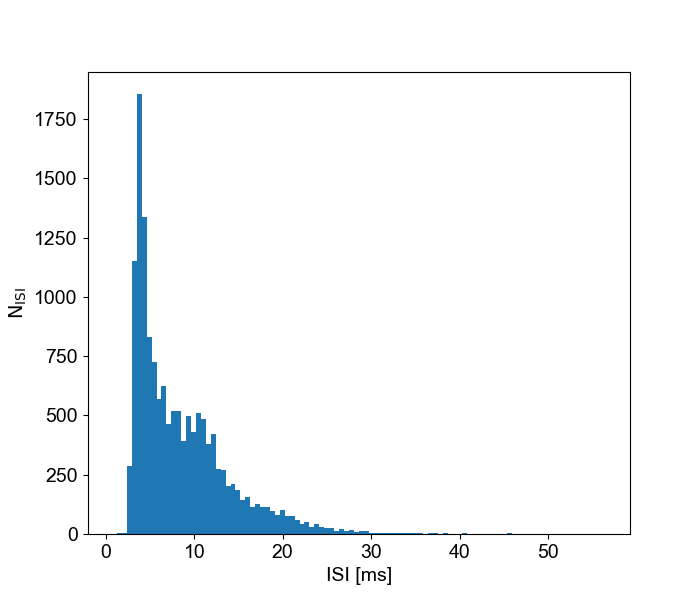

In [29]:
#Grafico el histograma normalizado de los ISI

fig, ax = plt.subplots(1,1, figsize=(7,6))
ax.hist(ISI_total*factor_to_ms, bins=100) #density=True
ax.set_xlabel('ISI [ms]')
ax.set_ylabel('$\mathrm{N_{ISI}}$')

plt.show()

#Guardo la figura
fig.savefig('Figures/ISI_histogram.png', bbox_inches='tight')


In [30]:
#Calculo media, desviación estandar y CV
media = np.mean(ISI_total)
desvio = np.std(ISI_total)
CV = desvio/media

#Imprimo datos
print(f'Media: {media*factor_to_ms} [ms]')
print(f'Desviación estandar: {desvio*factor_to_ms} [ms]')
print(f'CV: {CV}')




Media: 8.569324533638628 [ms]
Desviación estandar: 5.632006758066682 [ms]
CV: 0.6572287857646664


## Ejercicio 2

In [31]:
def N_calculation(realizaciones):
    #Calculo N
    #Devuelve un vector con los N
    return np.sum(realizaciones, axis=1)

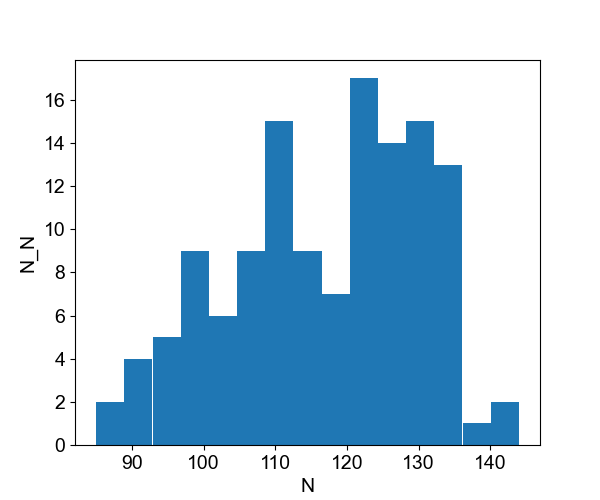

In [32]:
#Histograma de Ns normalizado

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.hist(N_calculation(spikes), bins=15) #density=True
ax.set_xlabel('N')
ax.set_ylabel('N_N')

plt.show()

#Guardo figura
fig.savefig('Figures/N_histogram.png', bbox_inches='tight')



In [33]:
#Calculo media, desviación estándar y factor de Fano
media = np.mean(N_calculation(spikes))
desvio = np.std(N_calculation(spikes))
Fano = desvio**2/media

#Imprimo datos
print(f'Media: {media}')
print(f'Desviación estandar: {desvio}')
print(f'Fano: {Fano}')


Media: 117.0078125
Desviación estandar: 13.534964036333593
Fano: 1.5656668349803031


### ¿El proceso es tipo "renewal"?

In [34]:
#Veo si se cumple la relación F = CV^2
print(f'F = {Fano}')
print(f'CV^2 = {CV**2}')



F = 1.5656668349803031
CV^2 = 0.43194967683769775


## Ejercicio 3

In [35]:
def firing_rate_calculation(index, realizaciones, T):
    '''
    Calculo la tasa de disparo usando una caja de ancho T expresada en unidades de 0.1 ms, es decir, como índice. Tiene que ser múltiplo de 2
    '''

    #Tomo la parte entera de index y T
    index = int(index)
    T2 = int(T/2)

    #Defino los límites de la caja
    l_inf = index-T2
    l_sup = index+T2

    #Verifico que los límites de la caja estén dentro de la realizaciones. En caso negativo, redefino los límites
    
    if l_inf < 0:
        l_inf = 0
    if l_sup > len(realizaciones[0,:]):
        l_sup = len(realizaciones[0,:])

    return np.sum(realizaciones[:,index-T2:index+T2])/(2*T2)

def firing_rate_total_calculation(realizaciones, T):

    t_vec = np.arange(len(realizaciones[0,:]))

    firing_rate = np.empty(len(t_vec))
    
    for i in range(len(t_vec)):
        firing_rate[i] = firing_rate_calculation(i, realizaciones, T)

    return firing_rate


In [36]:
#Grafico la tasa de disparo
def plt_tasa_de_disparo(T):

    fig, ax = plt.subplots(1,1, figsize=(6,5))
    ax.plot(firing_rate_total_calculation(spikes, T))
    ax.set_xlabel('Tiempo [0.1 ms]')
    ax.set_ylabel('Tasa de disparo')
    plt.show()


#Scrolleo T con un slider usando widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plt_tasa_de_disparo, T=widgets.IntSlider(min=2, max=1000, step=20, value=2));



interactive(children=(IntSlider(value=2, description='T', max=1000, min=2, step=20), Output()), _dom_classes=(…

## Ejercicio 4

In [37]:
print(stimulus[:,0])

[0.000e+00 1.000e-01 2.000e-01 ... 9.998e+02 9.999e+02 1.000e+03]


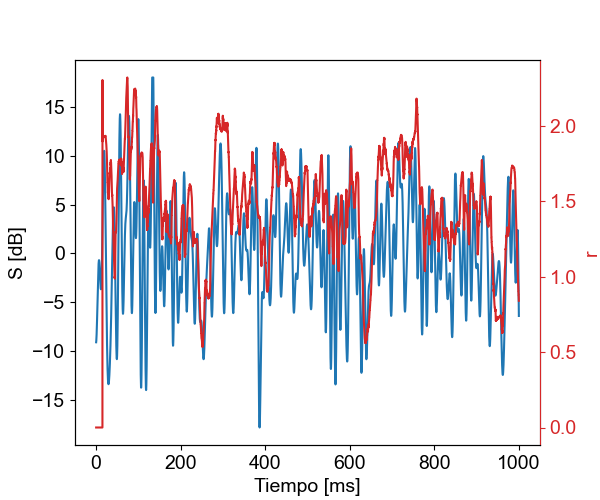

In [38]:
#Grafico stimulus y rate en la misma figura pero distintos ejes

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(stimulus[:,0], stimulus[:,1], color = "tab:blue")
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('S [dB]')

ax2 = ax.twinx()
T = 300
ax2.plot(np.arange(len(spikes[0]))*factor_to_ms, firing_rate_total_calculation(spikes, T), color = "tab:red")
ax2.set_xlabel('Tiempo [ms]')
ax2.set_ylabel('r', color = "tab:red")
#Cambio el color del eje y de los labels
ax2.spines['right'].set_color('tab:red')
ax2.tick_params(axis='y', colors='tab:red')

plt.show()

In [39]:
#Calculo t_SPIKES
def t_spikes_calculation(realizacion):
    #Calculo los tiempos a los que se da un spike (t_spkies) de una realización
    #realizacion es un vector de 0 y 1
    #Devuelve un vector con los t_spikes en unidades de 0.1 ms

    tiempos = np.array(realizacion)*np.linspace(0, len(realizacion), len(realizacion))
    #Descarto tiempos nulos
    t_spike = tiempos[tiempos != 0]
    
    return t_spike

def t_spikes_total_calculation(realizaciones):
    #Calculo los tiempos a los que se da un spike (t_spkies) de todas las realizaciones
    #realizaciones es una matriz de 0 y 1
    #Devuelve un vector con los t_spikes en unidades de 0.1 ms
    t_spike = np.array([])
    for realizacion in realizaciones:
        t_spike = np.concatenate([t_spike, t_spikes_calculation(realizacion)])
    return t_spike

t_spikes_total = t_spikes_total_calculation(spikes)

In [40]:
def kernel_lineal(t, t_spikes_total, stimulus_vec, sigma = 1):
    '''
    Calcula D expresado en unidades de dB
    t [ms]
    '''
    #Convierto t a unidades de 0.1 ms
    t = t*factor_to_ms

    #Calculo la diferencia entre tiempos
    dif = t_spikes_total - T

    #Elimino elementos negativos
    dif = dif[dif >= 0]

    #Evalúo S en dif como índices
    S_dif = stimulus_vec[dif]

    #Calculo D
    D = 1/sigma**2*np.sum(S_dif)

    return D

def kernel_constante(realizaciones):
    '''
    Calcula r0: valor medio de la tasa de disparo expresado en unidades de 1/0.1 ms
    
    '''

    return firing_rate_calculation(int(len(realizaciones)/2), realizaciones, T = int(len(realizaciones)))/len(realizaciones)




In [41]:
#Calculo kernel_lineal y kernel_constante
D_vec = np.empty(len(stimulus[:,0]))

t_spikes_total = t_spikes_total_calculation(spikes)

for i in range(len(stimulus[:,0])):
    D_vec[i] = kernel_lineal(stimulus[i,0], t_spikes_total, stimulus[:,1])

r0 = kernel_constante(spikes)

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
def modelo_lineal(r0, D_vec, stimulus):
    '''
    Calcula la tasa de disparo r con el modelo lineal en función de r0, D_vec y stimulus. 
    r(t) = r0 + int_0^infty D(t')*stimulus(t-t')
    '''
    r = np.empty(len(stimulus[:,0]))
    for i in range(len(stimulus[:,0])):
        r[i] = r0 + np.sum(D_vec*stimulus[t-t',1])
    return r



In [ ]:
#Grafico
